# NACA 4 Digit Series

A NACA 4 digit series has four numbers that describe it

$$naca4 = m\,p\,tt$$

where

$m$ is the maximum camber (in percent)
$p$ is the location of maximum camber (in tenths of chord)
$tt$ is the thickness/chord ratio (in percent)

the camber line is given by the equation

$$y_c =\left\{\begin{split} m\frac{x}{p^2}\left(2\,p-\frac{x}{c}\right),\,\,\,\,\,\,0\leq x\leq p\,c \\ \frac{m}{\left(1-p\right)^2}\left((1-2\,p) + 2\,p\frac{x}{c}-\left(\frac{x}{c}\right)^2\right),\,\,\,\,\,\,p\,c\leq x\leq c\end{split} \right.$$

the angle of the camber line is given by $\theta$,

$$\theta=\arctan\frac{\text{d}y_c}{\text{d}x}$$
$$\frac{\text{d}y_c}{\text{d}x}=\left\{\begin{split} \frac{2\,m}{p^2}\left(p-\frac{x}{c}\right),\,\,\,\,\,\,0\leq x\leq p\,c \\\frac{2\,m}{\left(1-p\right)^2}\left(p-\frac{x}{c}\right),\,\,\,\,\,\,p\,c\leq x\leq c\end{split} \right.$$

and the thickness is given by

$$y_t = 5\,t\,c\left[0.2969\left(\frac{x}{c}\right)^\frac{1}{2}-0.1260\left(\frac{x}{c}\right)-0.3516\left(\frac{x}{c}\right)^2+0.2843\left(\frac{x}{c}\right)^3-0.1015\left(\frac{x}{c}\right)^4\right]$$

and the location of maximum thickness is 30%

and the upper and lower surfaces are given by

$$x_u = x - y_t\sin\theta$$
$$x_l = x + y_t\sin\theta$$

$$y_u = y_c + y_t\cos\theta$$
$$y_l = y_c - y_t\cos\theta$$

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def naca4(number="2309", n=500):
    """
    Plot a 4 digit NACA aerofoil given a 4 digit input string
    
    inputs: number = the four-digit naca aerofoil number (optional, defaults to 2309)
          : n = the nunber of chordwise points (optional, defaults to 500)
    """
    m = float(number[0])/100 # Maximum camber as decima
    p = float(number[1])/10 # location of maximum camber as decimal
    t = float(number[2:])/100 # Thickness
    
    if m == 0:
        print(f"NACA {number} is symmetric, with a thickness of {t:1.2f}")
    else:        
        print(f"NACA {number} has max camber of {m:1.3f}, at {p:1.2f}, with a thickness of {t:1.2f}")
        
    # Define an x (chordwise) ordinate (normalised i.e., from 0 to 1)
    x = np.linspace(0, 1, n)
        
    def camberline(x, m, p):
        yc = np.zeros(x.shape)
        yc[x <= p] = m / p**2 * (2 * p * x[x <= p] - x[x <= p] **2)
        yc[x > p] = m / (1 - p)**2 * ((1 - 2 * p) + 2 * p * x[x > p] - x[x > p]**2)
        return yc
    
    yc = camberline(x, m, p)
    
    # Make a plot
    plt.figure()
    plt.plot(x, yc, '-b')
    
    # I want to get theta
    def theta_funct(x, m, p):
        if m > 0:
            # Then we have camber
            dydx = np.zeros(x.shape)
            dydx[x <= p] = 2 * m / p**2 * (p - x[x <= p])
            dydx[x > p] = 2 * m / (1 - p)**2 * (p - x[x >p])
            theta = np.arctan(dydx)
        else:
            theta = 0
            
        return theta

    theta = theta_funct(x, m, p)
    
    # We need the thickness
    a0 = 0.2969
    a1 = -0.1260
    a2 = -0.3516
    a3 = 0.2843
    a4 = -.1015
    yt = t * 5 * (a0 * x**.5 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4)
    
    # Hence I can define the upper and lower surfaces
    xu = x - yt*np.sin(theta)
    xl = x + yt*np.sin(theta)

    yu = yc + yt * np.cos(theta)
    yl = yc - yt * np.cos(theta)

        
    
    plt.plot(xu, yu, '-r')
    plt.plot(xl, yl, '-g')
    
    plt.gca().set_aspect("equal")
    

NACA 4415 has max camber of 0.040, at 0.40, with a thickness of 0.15


<IPython.core.display.Javascript object>


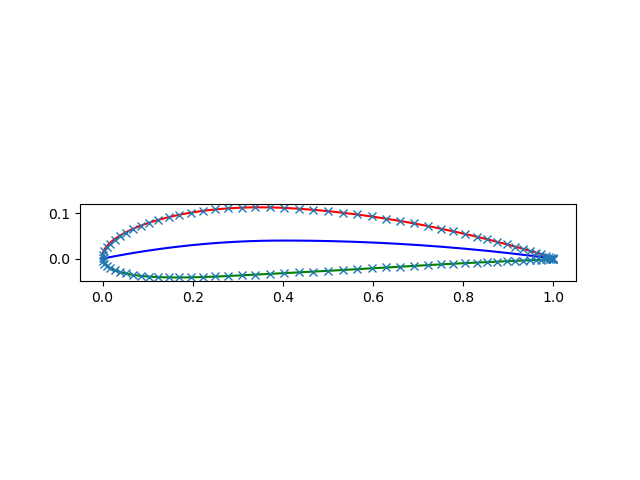

In [64]:
%matplotlib notebook
naca4('4415')

# Cessna drag polar
filename = "Data/NACA4415.dat"
data = np.genfromtxt(filename, delimiter="   ", skip_header=1)

plt.plot(data[:, 0], data[:, 1], 'x')


ValueError: A value in x_new is below the interpolation range.